# Random Forest - Census Income (Classification)
[h3-random-forest-baggging.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch3-random-forest-baggging.ipynb)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_census = pd.read_csv('https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter03/census_cleaned.csv')

X_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]

In [3]:
df_census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.056386,0.029483,0.064279,0.000215,...,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895857,0.002058,0.000491,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.230670,0.169159,0.245254,0.014661,...,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.305451,0.045316,0.022162,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   capital-gain                                32561 non-null  int64
 4   capital-loss                                32561 non-null  int64
 5   hours-per-week                              32561 non-null  int64
 6   workclass_ ?                                32561 non-null  int64
 7   workclass_ Federal-gov                      32561 non-null  int64
 8   workclass_ Local-gov                        32561 non-null  int64
 9   workclass_ Never-worked                     32561 non-null  int64
 10  workclass_ Private                

In [5]:
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Random Forest (Classification)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': -1, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}


### cross_val_score

In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_census, y_census, cv=5)

print('Accuracy:', np.round(scores, 3))
print('Avg. Accuracy: %0.3f' % (scores.mean()))

Accuracy: [0.851 0.844 0.851 0.852 0.851]
Avg. Accuracy: 0.850


### Evaluation

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_census, y_census, random_state=2)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8447365188551775

In [9]:
rf.score(X_test, y_test)

0.8447365188551775

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6145
           1       0.73      0.58      0.65      1996

    accuracy                           0.84      8141
   macro avg       0.80      0.76      0.77      8141
weighted avg       0.84      0.84      0.84      8141



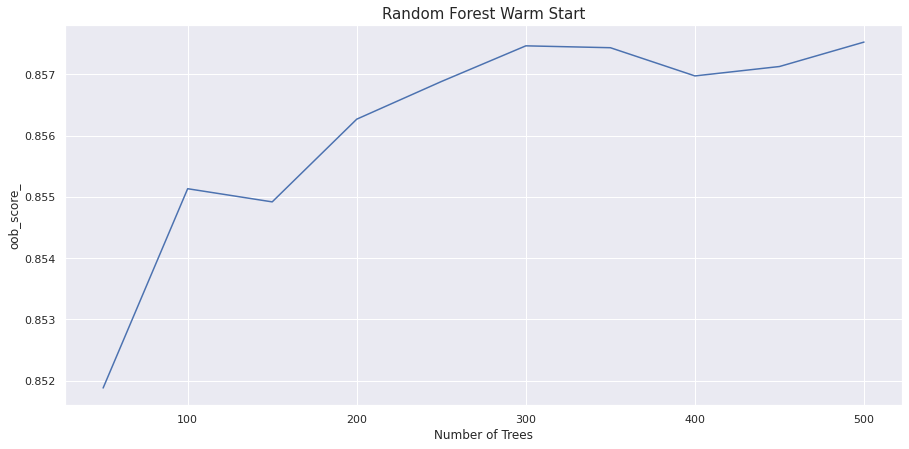

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # darkgrid
oob_scores = []

rf = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=2)
rf.fit(X_census, y_census)
oob_scores.append(rf.oob_score_)
est = 50
estimators=[est]

for i in range(9):
    est += 50
    
    estimators.append(est)
    rf.set_params(n_estimators=est)
    
    rf.fit(X_census, y_census)
        
    oob_scores.append(rf.oob_score_)  # append rf.oob_score into oob_scores

plt.figure(figsize=(15,7))
plt.plot(estimators, oob_scores)
plt.xlabel('Number of Trees')
plt.ylabel('oob_score_')
plt.title('Random Forest Warm Start', fontsize=15)
plt.show()

### HPO

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_clf(params, runs=20, clf=RandomForestClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    
    rand_clf.fit(X_train, y_train)

    best_model = rand_clf.best_estimator_    
    
    best_score = rand_clf.best_score_
    print("Best Score: {:.3f}".format(best_score))

    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {:.3f}'.format(accuracy))
        
    return best_model

In [13]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 2,
 'verbose': 0,
 'warm_start': True}

In [14]:
best_model = randomized_search_clf(
    params={'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
            'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
            'min_samples_leaf':[1,2,4,6,8,10,20,30],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,2,4,6,8,10,20]})

Best Score: 0.856
Accuracy: 0.847


In [15]:
best_model = randomized_search_clf(
    params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,4,6,8,10,12,15,20],
            'n_estimators':[100]}, 
    runs=20)

Best Score: 0.863
Accuracy: 0.860


In [23]:
best_model.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 0.6,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

### Verify the new hyperparameters

In [22]:
params = best_model.get_params(deep=True)
print(params)

min_samples_leaf = params['min_samples_leaf']
min_impurity_decrease = params['min_impurity_decrease']
max_features = params['max_features']
max_depth = params['max_depth']
n_estimators = params['n_estimators']
max_leaf_nodes = params['max_leaf_nodes']
min_samples_split = params['min_samples_split']

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 0.6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2, n_jobs=-1,
        min_samples_leaf=min_samples_leaf, min_impurity_decrease=min_impurity_decrease, max_features=max_features, max_depth=max_depth, n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, min_samples_split=min_samples_split)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8595995577938829

### ExtraTreesClassifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_validate

et = ExtraTreesClassifier(n_estimators=100, random_state=2, n_jobs=-1)
cv_results = cross_validate(et, X_train, y_train)

print('Avg. accuracy of cross validation:', np.mean(cv_results['test_score']))

Avg. accuracy of cross validation: 0.8415642915642916
